In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [2]:
medical1=pd.read_csv('heart.csv')
medical1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
medical1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
medical1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
medical1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
medical1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
medical=medical1.drop(columns=['fbs','chol'] ,axis=1)
medical

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


Text(0.5, 1.0, 'target_sex')

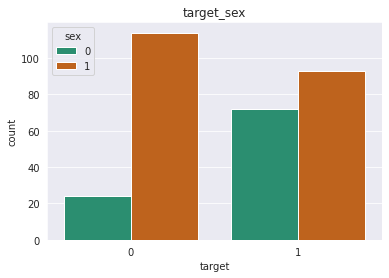

In [8]:
sns.set_style('darkgrid')
sns.countplot(x='target', hue='sex', data=medical,palette='Dark2').set_title('target_sex')

Text(0.5, 1.0, 'target_rectecg')

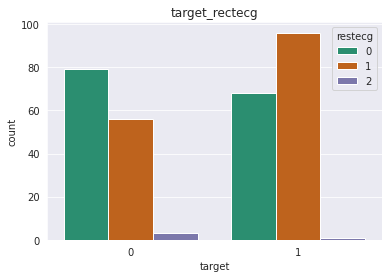

In [9]:
sns.set_style('darkgrid')
sns.countplot(x='target', hue='restecg', data=medical,palette='Dark2').set_title('target_rectecg')

## Modelling

In [10]:
x_train,x_test,y_train,y_test=train_test_split(medical.drop('target',axis=1),medical['target'],test_size=0.2,random_state=101)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
regressor=LogisticRegression(max_iter=10000)


In [13]:
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions=regressor.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [16]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

print(roc_auc_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

[[24  7]
 [ 2 28]]
0.853763440860215


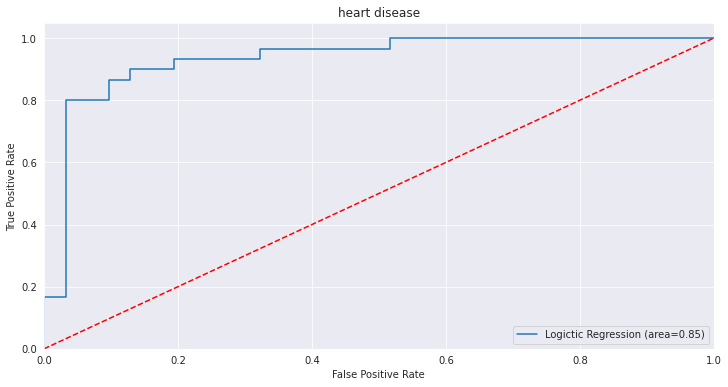

In [17]:
log_roc_auc=roc_auc_score(y_test,regressor.predict(x_test))
fp,tp,thresholds=roc_curve(y_test,regressor.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fp,tp,label='Logictic Regression (area=%0.2f)' % log_roc_auc )
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("heart disease")
plt.legend(loc='lower right')
plt.savefig('log_roc')
plt.show()


## SVM

In [18]:
from sklearn import svm
from sklearn import metrics

In [19]:
svm1=svm.SVC(kernel='linear',probability=True)
svm1.fit(x_train,y_train)
y_pred=svm1.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [20]:
y_test

221    0
8      1
89     1
154    1
201    0
      ..
202    0
48     1
255    0
178    0
153    1
Name: target, Length: 61, dtype: int64

In [21]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('precision:',metrics.precision_score(y_test,y_pred))
print('recall:',metrics.recall_score(y_test,y_pred))
print('classification report for SVM:' "\n",classification_report(y_test,y_pred))


accuracy: 0.8360655737704918
precision: 0.7777777777777778
recall: 0.9333333333333333
classification report for SVM:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



In [22]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [23]:
print('Accuracy Score for SVM:',score3 )
print('Auc Score for svm:',auc3 )

Accuracy Score for SVM: 0.8360655737704918
Auc Score for svm: 0.8376344086021505


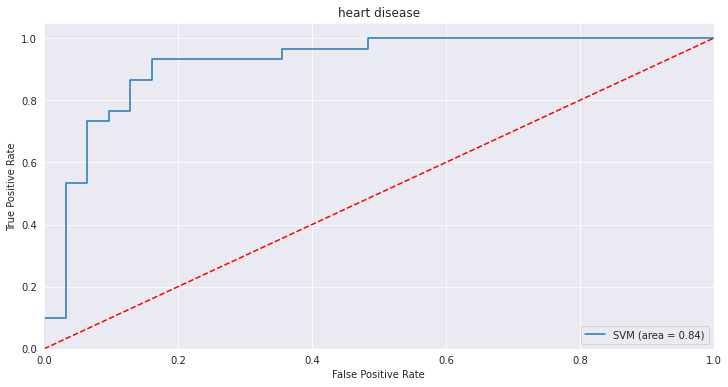

In [24]:
SVM_roc_auc = roc_auc_score(y_test,svm1.predict(x_test))
fp, tp, thresholds = roc_curve(y_test, svm1.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fp, tp, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('heart disease')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC_linear')
plt.show()

In [25]:
svm2=svm.SVC(kernel='rbf',probability=True)
svm2.fit(x_train,y_train)
y_pred=svm2.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [26]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('precision:',metrics.precision_score(y_test,y_pred))
print('recall:',metrics.recall_score(y_test,y_pred))
print('classification report for SVM:' "\n",classification_report(y_test,y_pred))


accuracy: 0.6721311475409836
precision: 0.6136363636363636
recall: 0.9
classification report for SVM:
               precision    recall  f1-score   support

           0       0.82      0.45      0.58        31
           1       0.61      0.90      0.73        30

    accuracy                           0.67        61
   macro avg       0.72      0.68      0.66        61
weighted avg       0.72      0.67      0.66        61



In [27]:
cm_3 = confusion_matrix(y_test,y_pred)
score_3 = accuracy_score(y_test,y_pred)
cr_3 = classification_report(y_test,y_pred)
auc_3 = roc_auc_score(y_test,y_pred)

In [28]:
print('Accuracy Score for SVM:',score_3 )
print('Auc Score for svm:',auc_3 )

Accuracy Score for SVM: 0.6721311475409836
Auc Score for svm: 0.6758064516129032


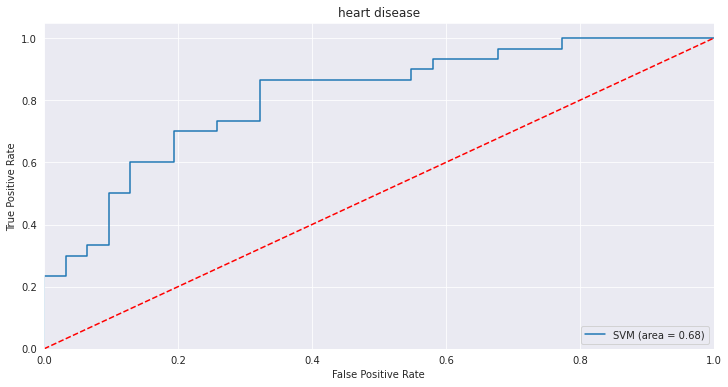

In [29]:
SVM_roc_auc = roc_auc_score(y_test,svm2.predict(x_test))
fp, tp, thresholds = roc_curve(y_test, svm2.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fp, tp, label='SVM (area = %0.2f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('heart disease')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC_rbf')
plt.show()

## Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [31]:
dt=DecisionTreeClassifier(criterion="entropy")
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dt=dt.fit(x_train,y_train)

In [33]:
y_pred=dt.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))


Accuracy: 0.819672131147541
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred=rf.predict(x_test)

In [38]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [39]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [40]:
from sklearn.naive_bayes import GaussianNB


In [41]:
NB1 = GaussianNB()
NB1.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
y_pred=NB1.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [43]:
cm2 = confusion_matrix(y_test,y_pred)
score2 = accuracy_score(y_test,y_pred)
cr2 = classification_report(y_test,y_pred)
auc2 = roc_auc_score(y_test,y_pred)

In [44]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )
print('Accuracy Score for Naive Bayes:',score2 )
print('Auc Score for Naive Bayes:',auc2 )
print('Classification Report for Naive Bayes:''\n''\n',cr2)


Confusion Matrix for Naive Bayes:
 [[25  6]
 [ 3 27]]
Accuracy Score for Naive Bayes: 0.8524590163934426
Auc Score for Naive Bayes: 0.8532258064516127
Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



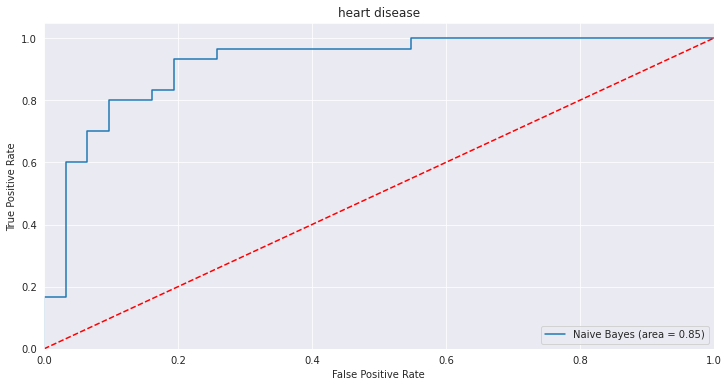

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc = roc_auc_score(y_test, NB1.predict(x_test))
fp, tp, thresholds = roc_curve(y_test, NB1.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,6))
plt.plot(fp, tp, label='Naive Bayes (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('heart disease')
plt.legend(loc="lower right")
plt.savefig('NB_ROC_medical')
plt.show()

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [47]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[25  6]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [48]:
(medical==0).sum().sum()

1025

In [49]:
(medical==1).sum().sum()

910